In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.smooth as smooth
import mlgrad.funcs as funcs
import ipywidgets

# %matplotlib widget

In [2]:
D = np.diff(np.eye(10), 2, axis=0)
W = 2*np.eye(8)
print(D)
print(D.T @ (W @ D))

[[ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]]
[[ 2. -4.  2.  0.  0.  0.  0.  0.  0.  0.]
 [-4. 10. -8.  2.  0.  0.  0.  0.  0.  0.]
 [ 2. -8. 12. -8.  2.  0.  0.  0.  0.  0.]
 [ 0.  2. -8. 12. -8.  2.  0.  0.  0.  0.]
 [ 0.  0.  2. -8. 12. -8.  2.  0.  0.  0.]
 [ 0.  0.  0.  2. -8. 12. -8.  2.  0.  0.]
 [ 0.  0.  0.  0.  2. -8. 12. -8.  2.  0.]
 [ 0.  0.  0.  0.  0.  2. -8. 12. -8.  2.]
 [ 0.  0.  0.  0.  0.  0.  2. -8. 10. -4.]
 [ 0.  0.  0.  0.  0.  0.  0.  2. -4.  2.]]


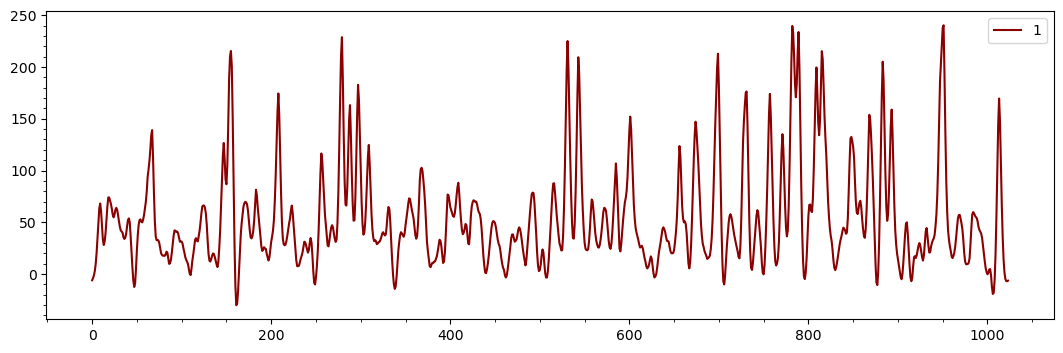

In [3]:
y = np.random.random(1024)
ii = np.random.randint(0, 1024, size=3000)
for i in ii:
    y[i] = 0
y += 0.03
y += np.random.normal(loc=0, scale=0.05, size=1024)
# y += y.min()
y[:6] = y[-6:] = 0


z = smooth.whittaker_smooth(1000*y, tau2=10.0)

plt.figure(figsize=(13,4))
# plt.vlines(range(1024), 0, y, alpha=0.5, label="0")
plt.plot(z, label="1", color="darkred")
plt.legend()
plt.minorticks_on()
plt.show()

In [4]:
x = z

In [5]:
tau2_slider = ipywidgets.FloatSlider(value=1, min=0, max=1.0e8, step=100)

def plot_wh(x):
    @ipywidgets.interact(tau2=tau2_slider, continuous_update=False)
    def _plot_wh(tau2=10.0):
        y = smooth.whittaker_smooth(x, tau2=tau2)
        plt.figure(figsize=(13,4))
        plt.plot(x, label="original")
        plt.plot(y, label="smoothed")
        plt.tight_layout()
        plt.show()

In [6]:
plot_wh(x)

interactive(children=(FloatSlider(value=1.0, description='tau2', max=100000000.0, step=100.0), Output()), _dom…

In [7]:
def baseline():
    xx = np.arange(1024)
    b = 500 / (1+xx/100) + 200*np.exp(-((xx-500)/200)**2 )
    return b

In [8]:
b = baseline()
xb = x + b

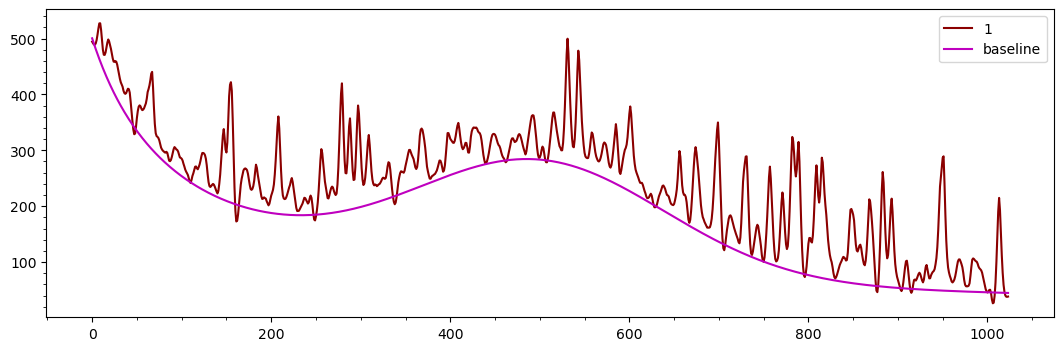

In [9]:
plt.figure(figsize=(13,4))
plt.plot(xb, label="1", color="darkred")
plt.plot(b, label="baseline", color="m")
plt.legend()
plt.minorticks_on()
plt.show()

In [38]:
def plot_wh_bl(x):
    @ipywidgets.interact(tau2=tau2_slider, continuous_update=False)
    def _plot_wh(tau2):
        tau2_slider.value = tau2
        xx = x / 100
        b, _ = smooth.whittaker_smooth_weight_func2(xx, tau2=tau2, 
                                                    func=funcs.Step(0.001, 0.001),
                                                    func2=funcs.Step(0.001, 0.001),
                                                    d=4)
        plt.figure(figsize=(13,4))
        plt.plot(xx, label="original")
        plt.plot(b, label="baseline")
        plt.tight_layout()
        plt.show()

In [39]:
plot_wh_bl(xb)

interactive(children=(FloatSlider(value=1633600.0000000002, description='tau2', max=100000000.0, step=100.0), …

In [12]:
x = z

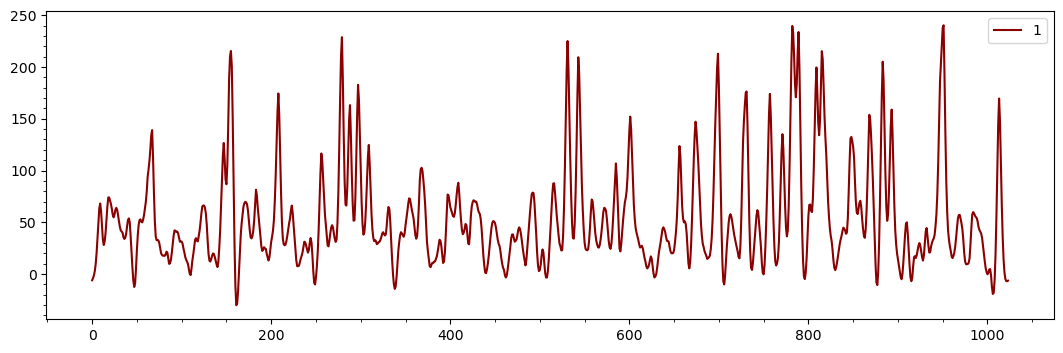

In [13]:
plt.figure(figsize=(13,4))
# plt.vlines(range(1024), 0, y, alpha=0.5, label="0")
plt.plot(x, label="1", color="darkred")
plt.legend()
plt.minorticks_on()
plt.show()

In [14]:
N = len(z)
z = np.random.random(N)*100
mu   = 1.0e2
tau2 = 1.0e2
delta = 1.0e2

In [15]:
D = np.diff(np.eye(N), 2)
D2 = D @ D.T

In [16]:
y = smooth.whittaker_smooth((delta/(1+delta))*x + (1/(1+delta))*z, tau2=tau2)

In [17]:
z = y - mu * np.sign(z)

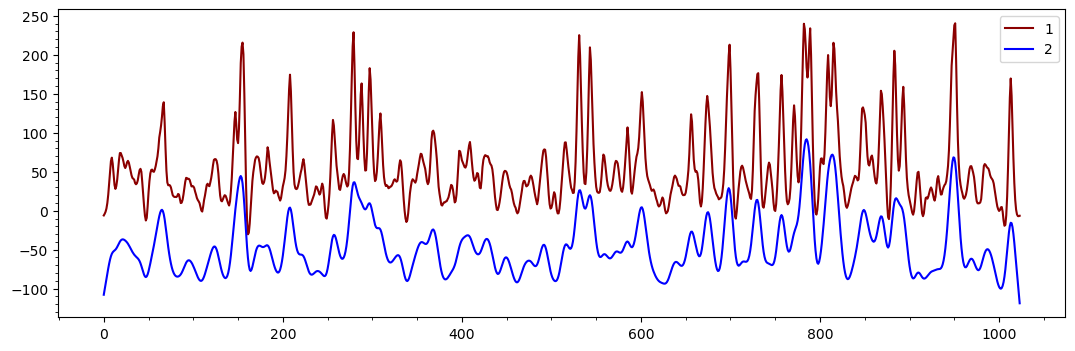

In [18]:
plt.figure(figsize=(13,4))
# plt.vlines(range(1024), 0, y, alpha=0.5, label="0")
plt.plot(x, label="1", color="darkred")
plt.plot(z, label="2", color="b")
plt.legend()
plt.minorticks_on()
plt.show()